In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


# this is gold price prediction project

# explain each code steps with purpose and give me the outcome from this project

# also detect problem statement


# IMPORTING DEPENDENCIES

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [15]:
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [17]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [18]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [19]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [20]:
df=df.drop(columns='Date')

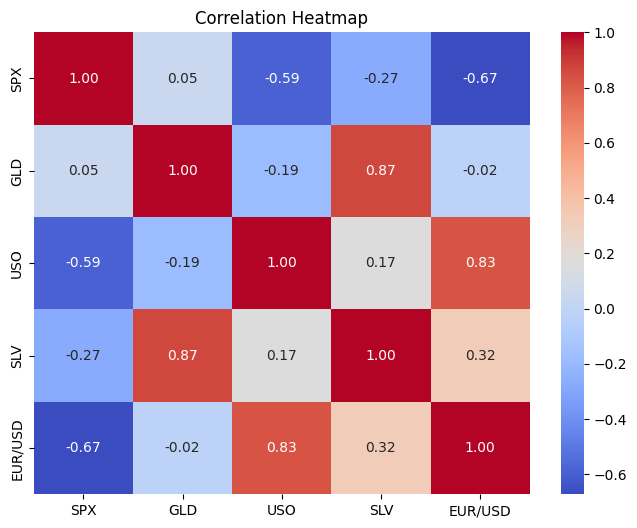

In [21]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

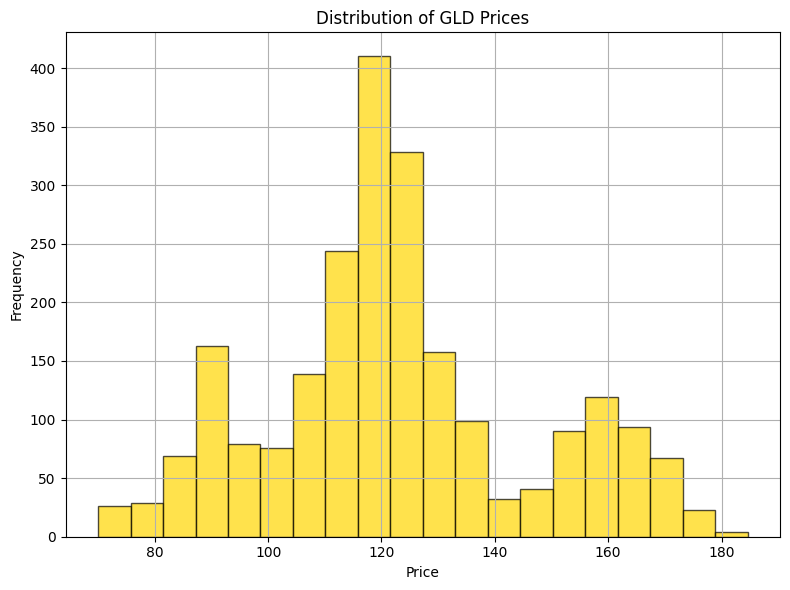

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(df['GLD'], bins=20, color='gold', edgecolor='black', alpha=0.7)
plt.title('Distribution of GLD Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

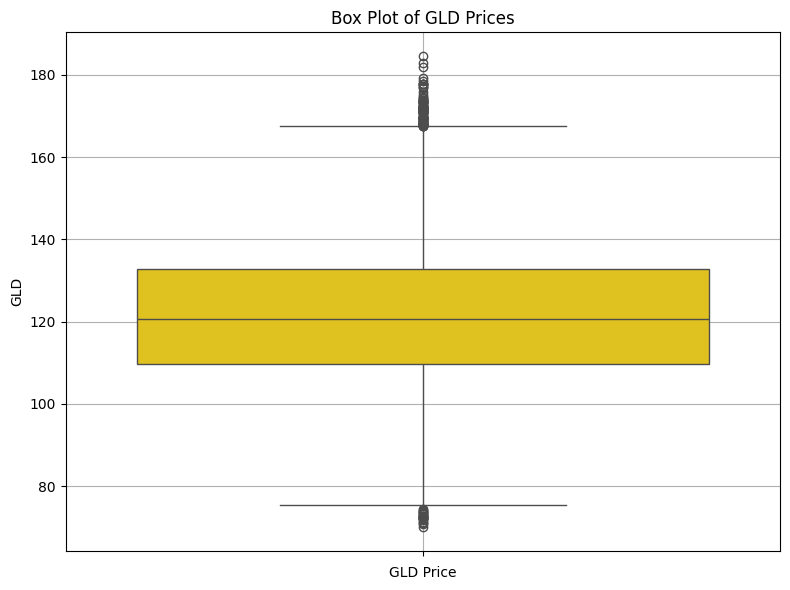

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['GLD'], color='gold')
plt.title('Box Plot of GLD Prices')
plt.xlabel('GLD Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# SPLITING DATA

In [31]:
X = df[['SPX', 'USO', 'SLV', 'EUR/USD']]
y = df['GLD']

# Scale the features

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# LINEAR REGRESSION

In [34]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (LR): {mae}")
print(f"Mean Squared Error (LR): {mse}")
print(f"R² Score(LR): {r2}")


Mean Absolute Error (LR): 5.695900644269291
Mean Squared Error (LR): 56.16559421500604
R² Score(LR): 0.8975640982991402


# RANDOM FOREST

In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [37]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (RF): {mae}")
print(f"Mean Squared Error (RF): {mse}")
print(f"R² Score(RF): {r2}")

Mean Absolute Error (RF): 1.23585567659389
Mean Squared Error (RF): 5.450565409816529
R² Score(RF): 0.9900591529327237


 GRADIENT BOOST

In [38]:
from sklearn.ensemble import  GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

print(f"Mean Absolute Error (GBR): {mae}")
print(f"Mean Squared Error (GBR): {mse}")
print(f"R² Score(GBR): {r2}")

Mean Absolute Error (GBR): 2.189256022461598
Mean Squared Error (GBR): 10.823637723932718
R² Score(GBR): 0.9802596392786268


# SVR

In [40]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)


In [41]:
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_gbr)

print(f"Mean Absolute Error (SVR): {mae}")
print(f"Mean Squared Error (SVR): {mse}")
print(f"R² Score(SVR): {r2}")

Mean Absolute Error (SVR): 3.536411639701453
Mean Squared Error (SVR): 30.528725176744015
R² Score(SVR): 0.9802596392786268


In [42]:


# Assuming you've already trained the models and predicted values:
# y_pred, y_pred_rf, y_pred_gbr, y_pred_svr are the predictions for each model

# Calculate performance metrics for Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

# Calculate performance metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Calculate performance metrics for Gradient Boosting
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Calculate performance metrics for Support Vector Regression
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print comparison table
print(f"{'Model':<25}{'MAE':<15}{'MSE':<15}{'R² Score':<15}")
print("="*70)
print(f"{'Linear Regression':<25}{mae_lr:<15.4f}{mse_lr:<15.4f}{r2_lr:<15.4f}")
print(f"{'Random Forest':<25}{mae_rf:<15.4f}{mse_rf:<15.4f}{r2_rf:<15.4f}")
print(f"{'Gradient Boosting':<25}{mae_gbr:<15.4f}{mse_gbr:<15.4f}{r2_gbr:<15.4f}")
print(f"{'Support Vector Regression':<25}{mae_svr:<15.4f}{mse_svr:<15.4f}{r2_svr:<15.4f}")


Model                    MAE            MSE            R² Score       
Linear Regression        5.6959         56.1656        0.8976         
Random Forest            1.2359         5.4506         0.9901         
Gradient Boosting        2.1893         10.8236        0.9803         
Support Vector Regression3.5364         30.5287        0.9443         
